# DFS

Path: 


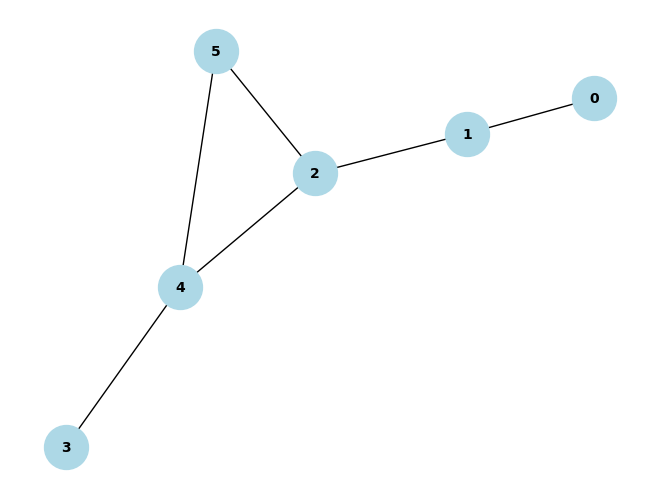

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
class Graph:
    def __init__(self, graph_dict=None):
        if graph_dict is None:
            graph_dict = {}
        self.graph_dict = graph_dict

    def vertices(self):
        return list(self.graph_dict.keys())

    def edges(self):
        return self.generate_edges()

    def add_vertex(self, vertex):
        if vertex not in self.graph_dict:
            self.graph_dict[vertex] = []

    def add_edge(self, edge):
        vertex1, vertex2 = tuple(edge)
        # Add both directions since it's an undirected graph
        if vertex1 in self.graph_dict:
            if vertex2 not in self.graph_dict[vertex1]:
                self.graph_dict[vertex1].append(vertex2)
        else:
            self.graph_dict[vertex1] = [vertex2]

        if vertex2 in self.graph_dict:
            if vertex1 not in self.graph_dict[vertex2]:
                self.graph_dict[vertex2].append(vertex1)
        else:
            self.graph_dict[vertex2] = [vertex1]

    def generate_edges(self):
        edges = []
        for vertex in self.graph_dict:
            for neighbor in self.graph_dict[vertex]:
                if {neighbor, vertex} not in edges:
                    edges.append({vertex, neighbor})
        return edges

    def __str__(self):
        res = "vertices: "
        for k in self.graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.generate_edges():
            res += str(edge) + " "
        return res


def depth_first_search(graph, start, goal):
    if start not in graph.graph_dict or goal not in graph.graph_dict:
        return []

    stack = [(start, [start])]
    visited = set()

    while stack:
        vertex, path = stack.pop()

        if vertex == goal:
            return path

        if vertex not in visited:
            visited.add(vertex)
            for neighbor in reversed(graph.graph_dict[vertex]):
                if neighbor not in visited:
                    new_path = path + [neighbor]
                    stack.append((neighbor, new_path))

    return []


def visualize_graph(graph, path):
    G = nx.Graph()
    for vertex in graph.graph_dict:
        for neighbor in graph.graph_dict[vertex]:
            G.add_edge(vertex, neighbor)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=1000, font_size=10, font_weight='bold')

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                               edge_color='r', width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=path,
                               node_color='orange')

    plt.show()


def main():
    v = int(input("Enter number of vertices: "))
    e = int(input("Enter number of edges: "))

    graph_dict = {}
    for i in range(v):
        graph_dict[str(i)] = []

    graph = Graph(graph_dict)
    print("Enter edges (space-separated vertices), one edge per line:")
    for i in range(e):
        u, v = input().split()
        graph.add_edge({u, v})

    start = input("Enter start vertex: ")
    goal = input("Enter goal vertex: ")

    path = depth_first_search(graph, start, goal)
    if path:
        print("Path:", ' -> '.join(path))
    else:
        print("No path found!")

    visualize_graph(graph, path)


if __name__ == "__main__":
    main()
# 5
# 6
# 0 1
# 1 2
# 2 4
# 2 5
# 3 4
# 4 5

# BFS

Enter edges (space-separated vertices), one edge per line:
Path: 0 -> 1 -> 2 -> 5


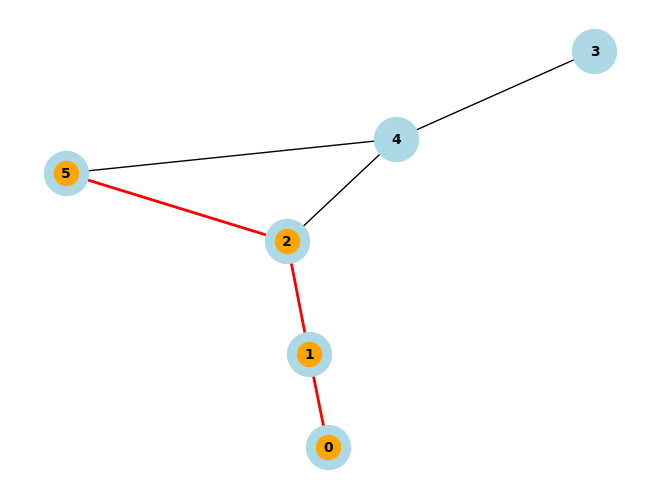

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class Graph:
    def __init__(self, graph_dict=None):
        if graph_dict is None:
            graph_dict = {}
        self.graph_dict = graph_dict

    def vertices(self):
        return list(self.graph_dict.keys())

    def edges(self):
        return self.generate_edges()

    def add_vertex(self, vertex):
        if vertex not in self.graph_dict:
            self.graph_dict[vertex] = []

    def add_edge(self, edge):
        vertex1, vertex2 = tuple(edge)
        # Add both directions since it's an undirected graph
        if vertex1 in self.graph_dict:
            if vertex2 not in self.graph_dict[vertex1]:
                self.graph_dict[vertex1].append(vertex2)
        else:
            self.graph_dict[vertex1] = [vertex2]
            
        if vertex2 in self.graph_dict:
            if vertex1 not in self.graph_dict[vertex2]:
                self.graph_dict[vertex2].append(vertex1)
        else:
            self.graph_dict[vertex2] = [vertex1]

    def generate_edges(self):
        edges = []
        for vertex in self.graph_dict:
            for neighbor in self.graph_dict[vertex]:
                if {neighbor, vertex} not in edges:
                    edges.append({vertex, neighbor})
        return edges

    def __str__(self):
        res = "vertices: "
        for k in self.graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.generate_edges():
            res += str(edge) + " "
        return res

def breadth_first_search(graph, start, goal):
    if start not in graph.graph_dict or goal not in graph.graph_dict:
        return []

    queue = deque([(start, [start])])
    visited = set()

    while queue:
        vertex, path = queue.popleft()
        
        if vertex == goal:
            return path
            
        if vertex not in visited:
            visited.add(vertex)
            
            for neighbor in graph.graph_dict[vertex]:
                if neighbor not in visited:
                    new_path = path + [neighbor]
                    queue.append((neighbor, new_path))
    
    return []

def visualize_graph(graph, path):
    G = nx.Graph()
    for vertex in graph.graph_dict:
        for neighbor in graph.graph_dict[vertex]:
            G.add_edge(vertex, neighbor)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=1000, font_size=10, font_weight='bold')

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, 
                             edge_color='r', width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=path, 
                             node_color='orange')

    plt.show()

def main():
    v = int(input("Enter number of vertices: "))
    e = int(input("Enter number of edges: "))
    graph_dict = {}
    for i in range(v):
        graph_dict[str(i)] = []
    graph = Graph(graph_dict)
    print("Enter edges (space-separated vertices), one edge per line:")
    for i in range(e):
        u, v = input().split()
        graph.add_edge({u, v})
    start = input("Enter start vertex: ")
    goal = input("Enter goal vertex: ")
    path = breadth_first_search(graph, start, goal)
    if path:
        print("Path:", ' -> '.join(path))
    else:
        print("No path found!")

    visualize_graph(graph, path)

if __name__ == "__main__":
    main()

# Water Jug

In [9]:
from collections import deque
class state:
    def __init__(self, jug1, jug2):
        self.jug1 = jug1
        self.jug2 = jug2
    def __str__(self):
        return "({}, {})".format(self.jug1, self.jug2)
    def __eq__(self, other):
        return self.jug1 == other.jug1 and self.jug2 == other.jug2
    def __hash__(self):
        return hash((self.jug1, self.jug2))
    def fill_jug1(self, capacity1):
        return state(capacity1, self.jug2)
    def fill_jug2(self, capacity2):
        return state(self.jug1, capacity2)
    def empty_jug1(self):
        return state(0, self.jug2)
    def empty_jug2(self):
        return state(self.jug1, 0)
    def pour_jug1_to_jug2(self, capacity2):
        pour_amount = min(self.jug1, capacity2 - self.jug2)
        return state(self.jug1 - pour_amount, self.jug2 + pour_amount)
    def pour_jug2_to_jug1(self, capacity1):
        pour_amount = min(self.jug2, capacity1 - self.jug1)
        return state(self.jug1 + pour_amount, self.jug2 - pour_amount)
def water_jug(capacity1, capacity2, target):
    start = state(0, 0)
    if start.jug2 == target:
        return [start]
    visited = set()
    queue = deque([start])
    visited.add(start)
    parent = {start: None}
    while queue:
        current = queue.popleft()
        for next_state in [current.fill_jug1(capacity1), current.fill_jug2(capacity2), current.empty_jug1(), current.empty_jug2(), current.pour_jug1_to_jug2(capacity2), current.pour_jug2_to_jug1(capacity1)]:
            if next_state in visited:
                continue
            queue.append(next_state)
            visited.add(next_state)
            parent[next_state] = current
            if next_state.jug2 == target or next_state.jug1==target:
                path = []
                while next_state:
                    path.append(next_state)
                    next_state = parent[next_state]
                return path[::-1]
    return []
def main():
    capacity1 = int(input("Enter capacity 1: "))
    capacity2 = int(input("Enter capacity 2: "))
    target = int(input("Enter target: "))
    result = water_jug(capacity1, capacity2, target)
    if result:
        for state in result:
            print(state)
    else:
        print("No solution")
if __name__ == "__main__":
    main()

(0, 0)
(3, 0)
(0, 3)
(3, 3)
(2, 4)
(2, 0)
(0, 2)
